In [52]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import matplotlib.font_manager as fm
import matplotlib.patches as mpatches

In [23]:
# Set up custom fonts (change path as needed)
dir_path = os.getcwd()  # Use os.getcwd() if not in a script
font_regular_path = os.path.join(dir_path, 'fonts', 'Proxima Nova Reg.otf')
font_semibold_path = os.path.join(dir_path, 'fonts', 'Proxima Nova Semibold.otf')
prop = fm.FontProperties(fname=font_regular_path)
prop_bold = fm.FontProperties(fname=font_semibold_path)

# Default plotting params function
def default_plotting_params():
    sns.set()
    sns.set_style('white')
    params = {'legend.fontsize': 12,
              'text.usetex': False,
              'axes.labelsize': 14,
              'axes.titlesize': 14,
              'xtick.labelsize': 12,
              'ytick.labelsize': 12}
    plt.rcParams.update(params)

default_plotting_params()

# Data
df = pd.DataFrame({
    "Year": ["2019", "2020", "2021", "2022", "2023", "2024", "2025"],
    "Value": [1, 4, 6, 8, 17, 72, 1]
})

# Material Design colors for each bar
MATERIAL_COLORS = [
    "#4285F4",  # Blue
    "#EA4335",  # Red
    "#FBBC05",  # Yellow
    "#34A853",  # Green
    "#9C27B0",  # Purple
    "#F4B400",  # Amber
    "#00ACC1",  # Cyan
]

In [24]:
# venues

acl_conferences = ['ACL', 'EMNLP', 'EACL', 'NAACL', 'RANLP']
big_three_conferences = ['ICML', 'NeurIPS', 'ICLR']

In [25]:
# Publication year data
years = np.array([2019, 2020, 2021, 2022, 2023, 2024, 2025])
year_counts = np.array([1, 4, 6, 8, 17, 72, 1])

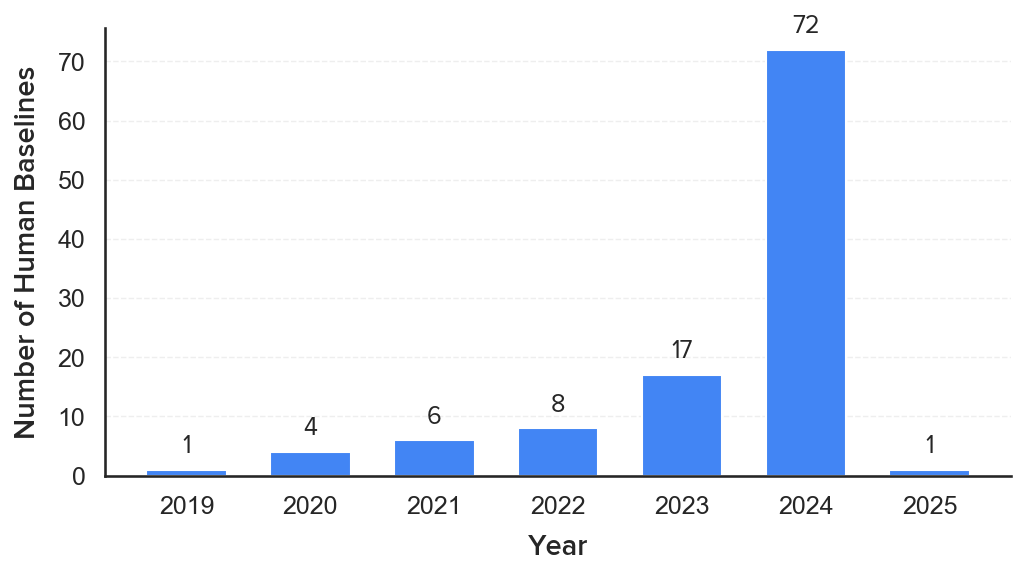

In [ ]:
# frequency bar chart for year
fig, ax = plt.subplots(figsize=(7, 4), dpi=150)

bars = ax.bar(df["Year"], df["Value"], color=MATERIAL_COLORS[0],
              edgecolor="white", width=0.65)

# Add value labels above each bar
for i, bar in enumerate(bars):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, height + 2, str(int(height)),
            ha='center', va='bottom', fontsize=12,
            fontproperties=prop)

# Titles and labels
ax.set_xlabel("Year", fontproperties=prop_bold, labelpad=8, fontsize=14)
ax.set_ylabel("Number of Human Baselines", fontproperties=prop_bold, labelpad=8, fontsize=14)

# Minimalist: Remove top/right spines
sns.despine(ax=ax, top=True, right=True)
ax.grid(True, axis='y', color='#EEEEEE', linestyle='--', linewidth=0.7)
ax.grid(False, axis='x')

plt.tight_layout()
plt.savefig("figures/baseline_year_frequencies.png")
plt.show()

In [60]:
# publication venue frequency data
venues = [
    "ACL", "Artificial Intelligence in Medicine", "CHI", "COLM",
    "ACM Web Conference",
    "Conference on Lifelong Learning Agents", "CoNLL", "CVPR", "EACL",
    "EC-TEL",
    "ECCV", "EECV HANDS Workshop", "EMNLP", "ICLR", "ICML",
    "IEEE/RSJ IROS",
    "Journal of Information and Telecommunication", "Journal of Pacific Rim Psychology",
    "Language Resources and Evaluation", "NAACL", "NeurIPS",
    "NeurIPS ML Safety Workshop", "NeurIPS Workshop on Tackling Climate Change with ML", "Organizational Research Methods",
    "Preprint", "EMNLP BlackboxNLP Workshop",
    "ACL ArabicNLP Workshop", "RANLP",
    "UNLP @ LREC-COLING 2024", "TMLR"
]
venue_counts = [
        15, 1, 2, 1, 1, 1, 1, 2, 1, 1, 2, 1, 10, 6, 2, 1, 1, 1, 1, 2, 13, 1, 1, 1, 34, 1, 1, 1, 1, 2
]

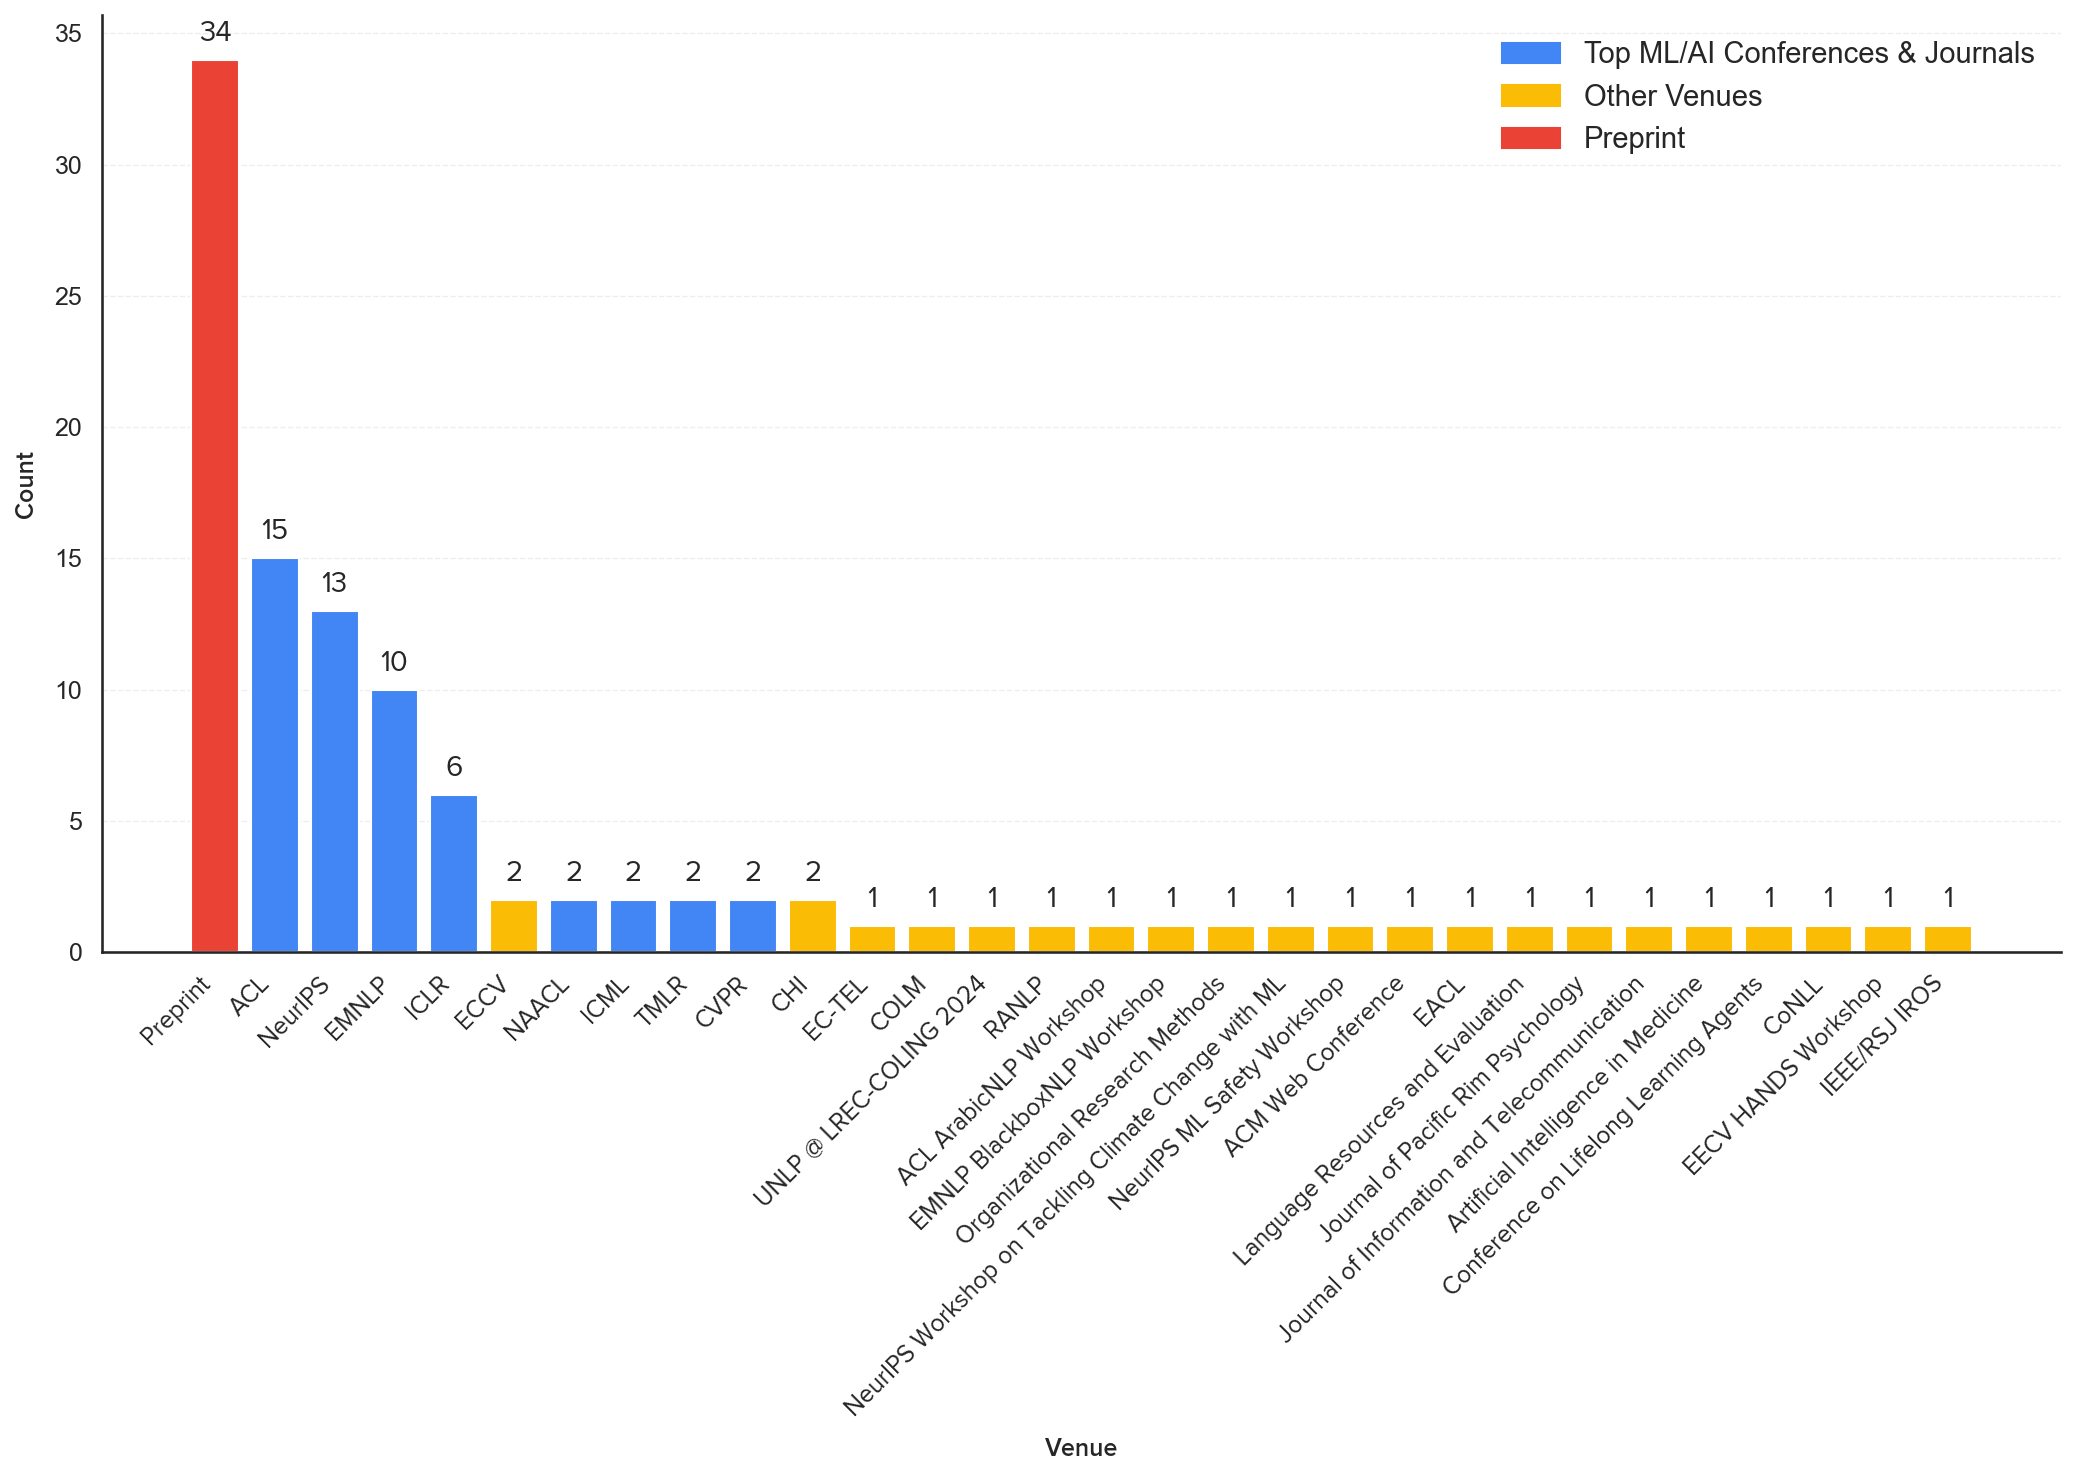

In [61]:
preprint_venue = {'Preprint'}
top_confs = {'ICML', 'NeurIPS', 'ICLR', 'UAI', 'AISTATS', 'COLT', 'ALT', 'JMLR', 'TMLR',
             'CVPR', 'ICCV', 'ACL', 'NAACL', 'EMNLP', 'SIMODS'} # From: https://icml.cc/Conferences/2025/PeerReviewFAQ

df = pd.DataFrame({'Publication Venue': venues, 'Count': venue_counts})
df_sorted = df.sort_values('Count', ascending=False)

# Colors (feel free to adjust these to your preferred palette)
color_preprint = "#EA4335"  # Gray
color_topconf = "#4285F4"   # Material blue
color_other = "#FBBC05"     # Material green

# Create a list of colors for each venue in sorted order
color_map = []
for v in df_sorted['Publication Venue']:
    if v in preprint_venue:
        color_map.append(color_preprint)
    elif v in top_confs:
        color_map.append(color_topconf)
    else:
        color_map.append(color_other)

fig, ax = plt.subplots(figsize=(14, 10), dpi=150)

bars = ax.bar(
    df_sorted['Publication Venue'],
    df_sorted['Count'],
    color=color_map,
    edgecolor="white"
)

# Add value labels above each bar
for bar in bars:
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2, height + 0.5,
        str(int(height)),
        ha='center', va='bottom', fontsize=14, fontproperties=prop
    )

# Rotate x labels for visibility
plt.setp(ax.get_xticklabels(), rotation=45, ha='right', fontproperties=prop)

# Add legend
legend_patches = [
    mpatches.Patch(color=color_topconf, label='Top ML/AI Conferences & Journals'),
    mpatches.Patch(color=color_other, label='Other Venues'),
    mpatches.Patch(color=color_preprint, label='Preprint')
]
ax.legend(handles=legend_patches, fontsize=14, frameon=False, loc='upper right')

# Titles and labels
ax.set_xlabel("Venue", fontproperties=prop_bold, labelpad=8)
ax.set_ylabel("Count", fontproperties=prop_bold, labelpad=8)

sns.despine(ax=ax, left=False, bottom=False, right=True, top=True)
ax.grid(True, axis='y', color='#EEEEEE', linestyle='--', linewidth=0.7)
ax.grid(False, axis='x')
plt.tight_layout()

plt.savefig("figures/venue_frequencies.png")
plt.show()

In [62]:
# Language data

languages = ['English', 'Chinese', 'Russian', 'Arabic', 'Spanish', 'Filipino', 'Hindi', 'Swahili', 'Ukrainian', 'Japanese', 'Greman', 'French', 'Italian', 'Portuguese', 'Korean', 'Kalamang', 'Bengali', 'Dutch', 'Hebrew']
language_counts = [89, 9, 5, 3, 3, 2, 2, 1, 1, 3, 2, 3, 1, 2, 1, 1, 1, 1, 1]

KeyError: 'Language'

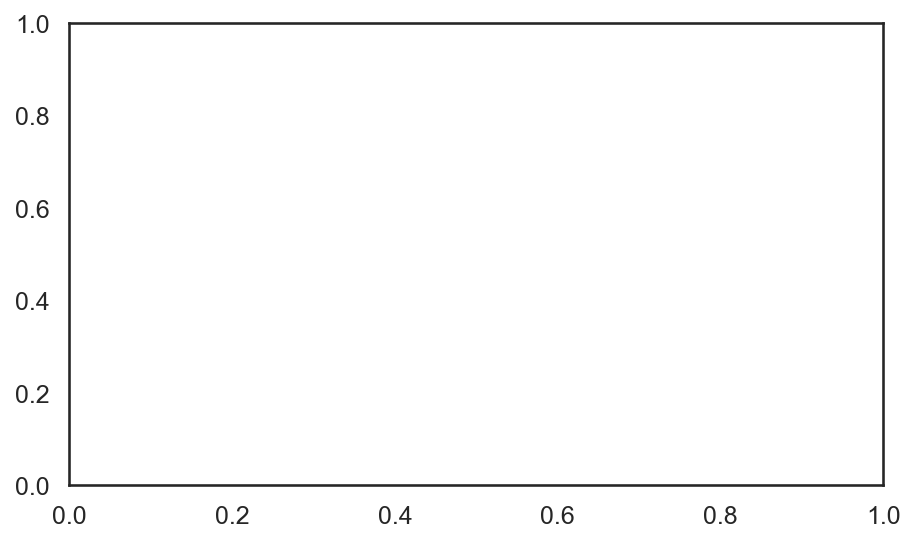

In [63]:
# publication venue frequency data

df = pd.DataFrame({'Language': languages, 'Count': language_counts})
df_sorted = df.sort_values('Count', ascending=False)

# frequency bar chart for year
fig, ax = plt.subplots(figsize=(7, 4), dpi=150)

bars = ax.bar(df_sorted["Language"], df_sorted["Count"], color=MATERIAL_COLORS[0],
              edgecolor="white", width=0.65)

# Add value labels above each bar
for i, bar in enumerate(bars):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, height + 2, str(int(height)),
            ha='center', va='bottom', fontsize=12,
            fontproperties=prop)
    
# Rotate x labels for visibility
plt.setp(ax.get_xticklabels(), rotation=45, ha='right', fontproperties=prop)

# Titles and labels
ax.set_xlabel("Language", fontproperties=prop_bold, labelpad=8, fontsize=14)
ax.set_ylabel("Number of Baselines", fontproperties=prop_bold, labelpad=8, fontsize=14)

# Minimalist: Remove top/right spines
sns.despine(ax=ax, top=True, right=True)
ax.grid(True, axis='y', color='#EEEEEE', linestyle='--', linewidth=0.7)
ax.grid(False, axis='x')

plt.tight_layout()
plt.savefig("figures/baseline_year_frequencies.png")
plt.show()